# Goal

In this notebook, we create word embeddings from raw text extracted from IMDB movie reviews.

## Creating In-Memory Text and Label Data

In [1]:
import os


imdb_dir = './imdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
    
        if label_type == 'neg':
            labels.append(0)
        else:
            labels.append(1)

In [2]:
len(texts)

25000

In [3]:
texts[0]

"I had the misfortune of wasting 10 quid buying SS new movie on DVD: Attack Force. Now i usually can suspend my belief watching films like this. A pinch of salt and some beers on a dark evening on the sofa watching a noisy late evening shoot em up is perfect for a single alpha male like me. I bought this film thinking I'd see cool martial arts and shoot em up.<br /><br />Did i hell. Segal is old and bloated, the plot was ludicrous even by SS standards and to cap it all off Segal's acting (such as it was to start with) is exceptionally dire. So dire in fact that half of his voice was dubbed over by a man who sounded NOTHING LIKE HIM. Either SS cant act no more (a moot point) of the crew were so dreadful at their jobs they couldn't record the sound properly. The voice would flick back and forth between Mr Whisper Segal and the man who does voice overs for Honda adverts!<br /><br />Plot wise isn't the issue because most action films work along the same premise as this one, nothing new the

In [4]:
labels[0]

0

In [5]:
review_lengths = [len(review) for review in texts]
sum(review_lengths) / len(review_lengths)

1325.06964

## Tokenizing the Text Data

In [6]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import numpy as np


maxlen = 1300 # maximum number of words in a review to use
num_train_samples = 20000 # maximum number of reviews to use
num_val_samples = 5000
size_of_vocab = 10000 # use a vocabulary of 10000 most widely used words


tokenizer = Tokenizer(num_words=size_of_vocab)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [7]:
word_index = tokenizer.word_index
print(f'Found {len(word_index)} unique tokens.')

Found 88582 unique tokens.


#### Word Indices and Sequences

In [8]:
list(word_index.keys())[:5]

['the', 'and', 'a', 'of', 'to']

In [9]:
word_index['the']

1

In [10]:
t = Tokenizer(num_words=5)
t.fit_on_texts(["This is a nice one isn't it?", "The quick brown fox jumps over the lazy dog"])
t.word_index

{'the': 1,
 'this': 2,
 'is': 3,
 'a': 4,
 'nice': 5,
 'one': 6,
 "isn't": 7,
 'it': 8,
 'quick': 9,
 'brown': 10,
 'fox': 11,
 'jumps': 12,
 'over': 13,
 'lazy': 14,
 'dog': 15}

In [11]:
seq = t.texts_to_sequences(["This is a nice one isn't it?", "The quick brown fox jumps over the lazy dog"])
seq

[[2, 3, 4], [1, 1]]

In [12]:
pad_sequences(seq, maxlen=5)

array([[0, 0, 2, 3, 4],
       [0, 0, 0, 1, 1]], dtype=int32)

#### Back to Embeddings

In [13]:
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)

print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (25000, 1300)
Shape of label tensor: (25000,)


In [14]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
indices[:10]

array([20671,  3847, 16890,  2090, 17626, 16110, 12941, 23983,  6655,
       19822])

In [15]:
data = data[indices]
labels = labels[indices]

x_train = data[:num_train_samples]
y_train = labels[:num_train_samples]
x_val = data[num_train_samples: num_train_samples + num_val_samples]
y_val = labels[num_train_samples: num_train_samples + num_val_samples]

## GLOVE Word Embeddings

The Glove word embeddings file can be downloaded from https://nlp.stanford.edu/projects/glove. The embeddings have been computed from the 2014 English Wikipedia containing 100-dimensional embedding vectors for 400,000 words (or nonword tokens). The text file ``glove.6B.100d.txt`` contains words and their embeddings. 

### Parsing GLOVE Word Embeddings

In [16]:
glove_dir = './glove6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))

for line in f:
    values = line.split()
    word = values[0] # this is not an index but the actual word
    vect = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = vect

f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [17]:
list(embeddings_index.keys())[100:105]

['so', 'them', 'what', 'him', 'united']

In [18]:
embeddings_index['them']

array([-1.0131e-01,  1.0941e-01,  2.4065e-01, -6.6767e-01, -1.8687e-01,
        9.1068e-01, -4.9355e-01,  2.2234e-01, -6.8759e-04, -2.6330e-01,
        3.5566e-01,  2.5153e-01,  2.7620e-01,  2.5009e-01,  5.8282e-01,
       -6.3401e-01,  4.7375e-02,  1.8918e-01, -8.2015e-01,  6.8126e-01,
        2.0599e-01, -3.9743e-01,  6.6879e-01, -1.9695e-01,  7.2995e-03,
       -4.5157e-01, -4.4265e-01, -6.6212e-01,  3.9773e-01, -2.7854e-01,
        2.4966e-01,  2.9716e-01, -4.1428e-01, -1.9447e-01,  1.1666e-01,
        2.9235e-01, -5.6770e-02,  5.1592e-02, -3.2637e-01, -4.3910e-01,
       -7.7075e-01, -1.8956e-01, -2.0683e-01, -6.6622e-01, -9.1887e-02,
       -3.9072e-02, -2.7523e-01,  1.7081e-01, -5.8020e-01, -6.8760e-01,
       -7.9209e-02,  2.8970e-01, -9.7517e-02,  1.8687e+00, -2.7563e-01,
       -2.1903e+00,  3.5603e-01, -3.7762e-01,  1.9264e+00,  2.1876e-01,
       -2.1676e-01,  1.5126e+00, -2.1941e-01,  3.3431e-01,  4.7717e-01,
        2.2636e-02,  1.1532e+00,  8.6151e-01,  5.1738e-03, -1.65

### Creating an Embedding Matrix

This matrix must be of shape (vocabulary size, embedding vector size), where entry $i$ contains
the vector for the word $i$ in the reference word index (built during tokenization). Note that index $0$ isn’t supposed to stand for any word or token—it’s a placeholder.

In [19]:
embedding_dim = 100
embedding_matrix = np.zeros(shape=(size_of_vocab, embedding_dim))
word_idx = tokenizer.word_index

for word, idx in word_idx.items():
    if idx < size_of_vocab and word in embeddings_index.keys():
        word_embedding = embeddings_index[word]
        embedding_matrix[idx] = word_embedding

## Model Definition

In [20]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense


model = Sequential()
model.add(Embedding(size_of_vocab, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1300, 100)         1000000   
_________________________________________________________________
flatten (Flatten)            (None, 130000)            0         
_________________________________________________________________
dense (Dense)                (None, 32)                4160032   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 5,160,065
Trainable params: 5,160,065
Non-trainable params: 0
_________________________________________________________________


### Load the GLOVE Embeddings in Model

In [21]:
model.layers

In [22]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1300, 100)         1000000   
_________________________________________________________________
flatten (Flatten)            (None, 130000)            0         
_________________________________________________________________
dense (Dense)                (None, 32)                4160032   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 5,160,065
Trainable params: 5,160,065
Non-trainable params: 0
_________________________________________________________________


### Training and Evaluation

In [23]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])

history = model.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_data=(x_val, y_val))

model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
625/625 [==============================] - 58s 93ms/step - loss: 0.5998 - acc: 0.6902 - val_loss: 0.4803 - val_acc: 0.7704
Epoch 2/10
625/625 [==============================] - 54s 87ms/step - loss: 0.3125 - acc: 0.8689 - val_loss: 0.4664 - val_acc: 0.8366
Epoch 3/10
625/625 [==============================] - 56s 90ms/step - loss: 0.1698 - acc: 0.9352 - val_loss: 0.4054 - val_acc: 0.8430
Epoch 4/10
625/625 [==============================] - 54s 86ms/step - loss: 0.0885 - acc: 0.9693 - val_loss: 0.4888 - val_acc: 0.8468
Epoch 5/10
625/625 [==============================] - 64s 103ms/step - loss: 0.0389 - acc: 0.9879 - val_loss: 0.6183 - val_acc: 0.8410
Epoch 6/10
625/625 [==============================] - 56s 89ms/step - loss: 0.0143 - acc: 0.9955 - val_loss: 0.7506 - val_acc: 0.8432
Epoch 7/10
625/625 [==============================] - 57s 91ms/step - loss: 0.0078 - acc: 0.9980 - val_loss: 0.8898 - val_acc: 0.8410
Epoch 8/10
625/625 [==============================] - 54s 86m

### Plots

In [24]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

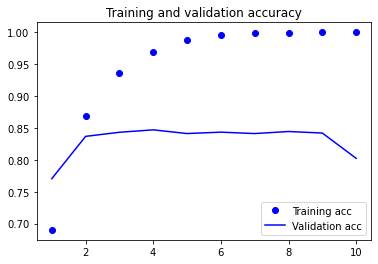

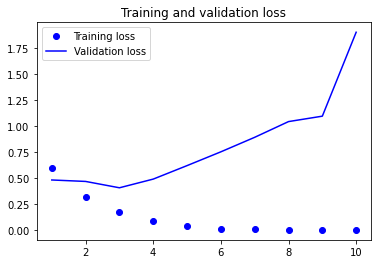

In [25]:
import matplotlib.pyplot as plt



acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

# Create new figure
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Test accuracy

In [26]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
    
        if label_type == 'neg':
            labels.append(0)
        else:
            labels.append(1)

seq_test = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(seq_test, maxlen=maxlen)
y_test = np.asarray(labels)

In [27]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 22s 28ms/step - loss: 1.7640 - acc: 0.8037


[1.7640249729156494, 0.8036800026893616]